In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from IPython.display import Image
from sklearn import tree
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import export_graphviz
from six import StringIO
import pydotplus
from sklearn.datasets import load_iris
from lightgbm import LGBMRegressor
from category_encoders import OrdinalEncoder
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [87]:
#imports dataset
df = pd.read_csv("H:\\bank-full.csv")
af = pd.DataFrame()

In [88]:
#Checks if dataset is null for any tuple
df.isnull().sum().sum()

0

In [89]:
#Sets all categorical attributes as category type
df['job'] = df['job'].astype('category')
df['marital'] =df['marital'].astype('category')
df['education'] =df['education'].astype('category')
df['default'] =df['default'].astype('category')
df['housing'] =df['housing'].astype('category')
df['loan'] =df['loan'].astype('category')
df['contact'] =df['contact'].astype('category')
df['month'] =df['month'].astype('category')
df['poutcome'] =df['poutcome'].astype('category')
df['y'] =df['y'].astype('category')

In [90]:
#Calculates the Mean, Median, Standard Deviation, Minimum and Maximum Values for all attributes
ageMean = df['age'].mean()
ageStd = df['age'].std()
ageMedian = df['age'].median()
minAge = df['age'].min()
maxAge = df['age'].max()

dayMean = df['day'].mean()
dayMedian = df['day'].median()
dayStd = df['day'].std()
dayMax = df['day'].max()
dayMin = df['day'].min()

pdaysStd = df['pdays'].std()
pdaysMean = df['pdays'].mean()
pdaysMedian = df['pdays'].median()
pdaysMax = df['pdays'].max()
pdaysMin = df['pdays'].min()

balanceMean = df['balance'].mean()
balanceMedian = df['balance'].median()
balanceStd = df['balance'].std()
balanceMax = df['balance'].max()
balanceMin = df['balance'].min()

campaignStd = df['campaign'].std()
campaignMean = df['campaign'].mean()
campaignMedian = df['campaign'].median()
campaignMax = df['campaign'].max()
campaignMin = df['campaign'].min()

previousStd = df['previous'].std()
previousMean = df['previous'].mean()
previousMedian = df['previous'].median()
previousMax = df['previous'].max()
previousMin = df['previous'].min()

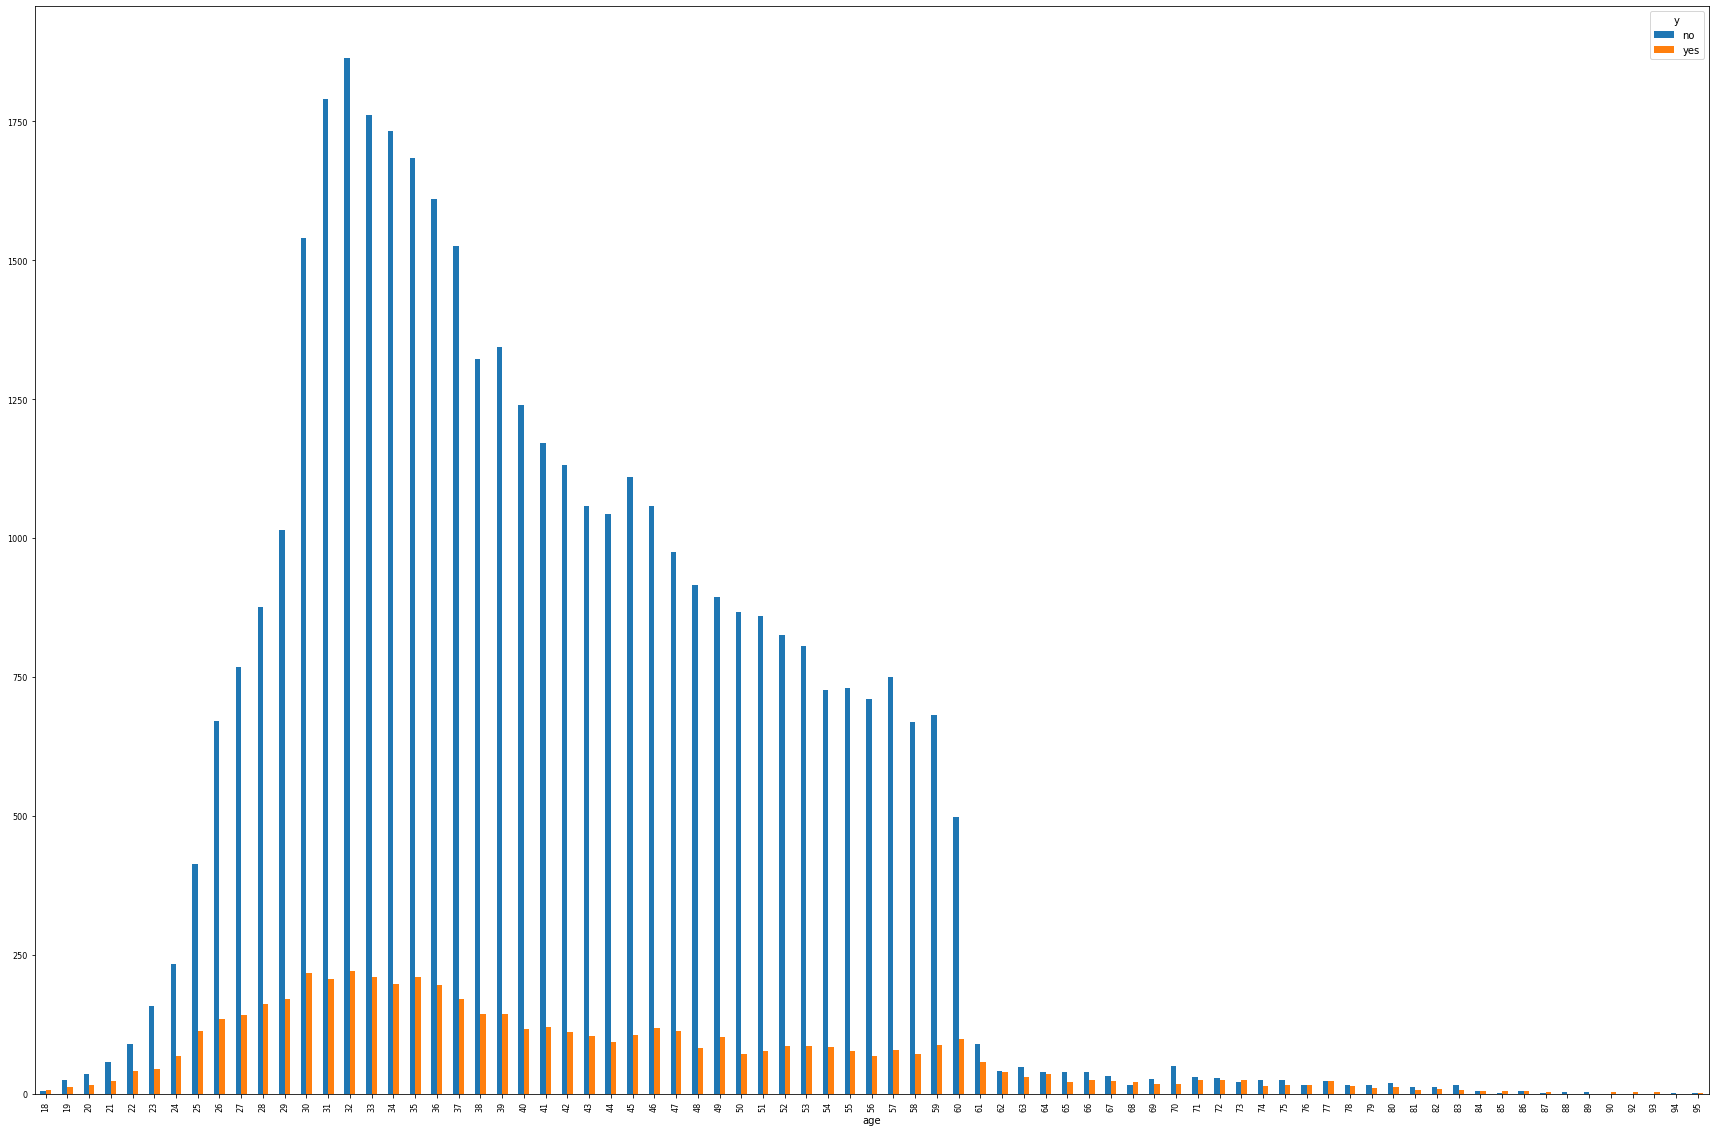

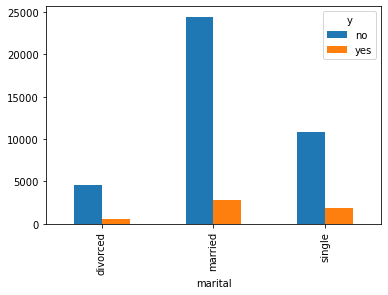

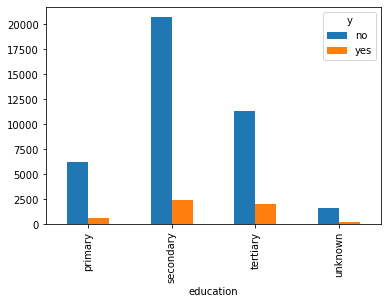

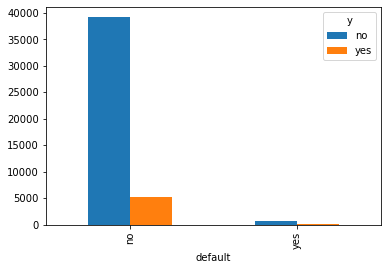

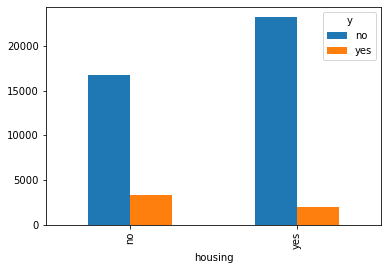

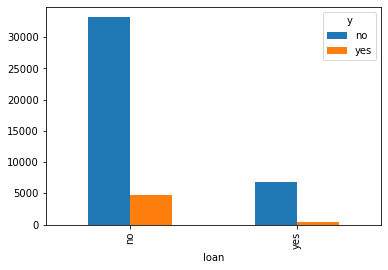

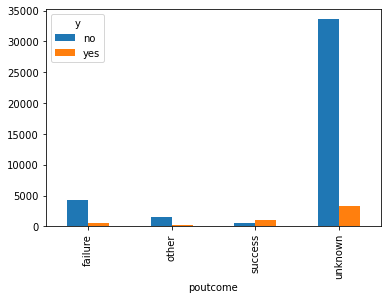

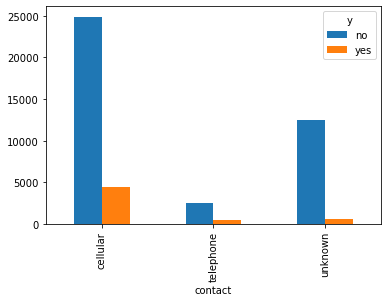

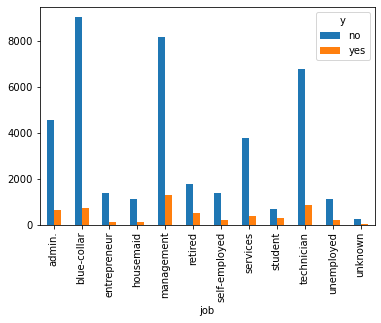

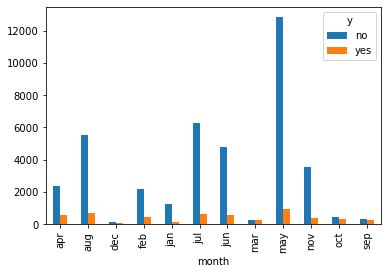

In [91]:
#Compares multiple attributes to the y attribute
pd.crosstab(df['age'],df['y']).plot.bar(figsize=(30,20), fontsize=8)
plt.show()

pd.crosstab(df['marital'],df['y']).plot.bar()
plt.show()

pd.crosstab(df['education'],df['y']).plot.bar()
plt.show()

pd.crosstab(df['default'],df['y']).plot.bar()
plt.show()

pd.crosstab(df['housing'],df['y']).plot.bar()
plt.show()

pd.crosstab(df['loan'],df['y']).plot.bar()
plt.show()

pd.crosstab(df['poutcome'],df['y']).plot.bar()
plt.show()

pd.crosstab(df['contact'],df['y']).plot.bar()
plt.show()

pd.crosstab(df['job'],df['y']).plot.bar()
plt.show()

pd.crosstab(df['month'],df['y']).plot.bar()
plt.show()

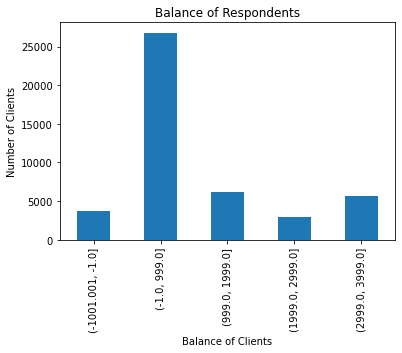

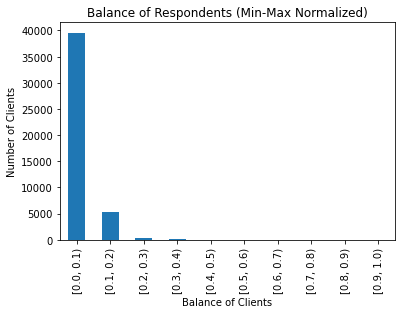

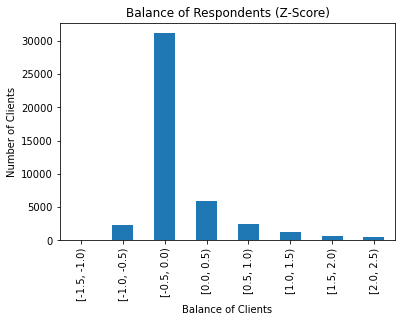

In [92]:
#This code prints out a formatted version of the Balance Attribute from Bank-Full.csv
af['ClippedBalance'] = np.clip(df['balance'], -1000, 3000)
step = 1000
bin_range_ClippedBalance = np.arange(-1001, 3001+step, step)
out, bins = pd.cut(af['ClippedBalance'], bins=bin_range_ClippedBalance, right=True, include_lowest=True, retbins=True)
out.value_counts(sort=False).plot.bar(title='Balance of Respondents')
plt.xlabel("Balance of Clients")
plt.ylabel("Number of Clients")
plt.show()

# Using Min-Max Normalization for Balance Attribute
def MinMaxScalar(X):
    return (X - balanceMin)/(balanceMax-balanceMin)

df['minMaxNormalization_Balance'] = df['balance'].apply(MinMaxScalar)

MinMaxNormalized_BalanceMin = df['minMaxNormalization_Balance'].min()
MinMaxNormalized_BalanceMax = df['minMaxNormalization_Balance'].max()

#Prints Min-Max Normalized Histogram of the Balance Attribute
step = 0.1
bin_range_normalized = np.arange(0.0, 1.0+step, step)
out, bins = pd.cut(df['minMaxNormalization_Balance'], bins=bin_range_normalized, include_lowest=True, right=False, retbins=True)
out.value_counts(sort=False).plot.bar(title='Balance of Respondents (Min-Max Normalized)')
normalizedBalancePlot = plt.plot()
plt.xlabel("Balance of Clients")
plt.ylabel("Number of Clients")
plt.show()

# Using z-score Normalization
df['z_score_balance'] = stats.zscore(df['balance'])

zScore_BalanceMin = df['z_score_balance'].min()
zScore_BalanceMax = df['z_score_balance'].max()

#Prints z-score Normalized Histogram
step = 0.5
bin_range_zScoreBalancenormalized = np.arange(-1.5, 3, step)
out, bins = pd.cut(df['z_score_balance'], bins=bin_range_zScoreBalancenormalized, include_lowest=True, right=False, retbins=True)
out.value_counts(sort=False).plot.bar(title='Balance of Respondents (Z-Score)')
zScoreNormalizedBalancePlot = plt.plot()
plt.xlabel("Balance of Clients")
plt.ylabel("Number of Clients")
plt.show()

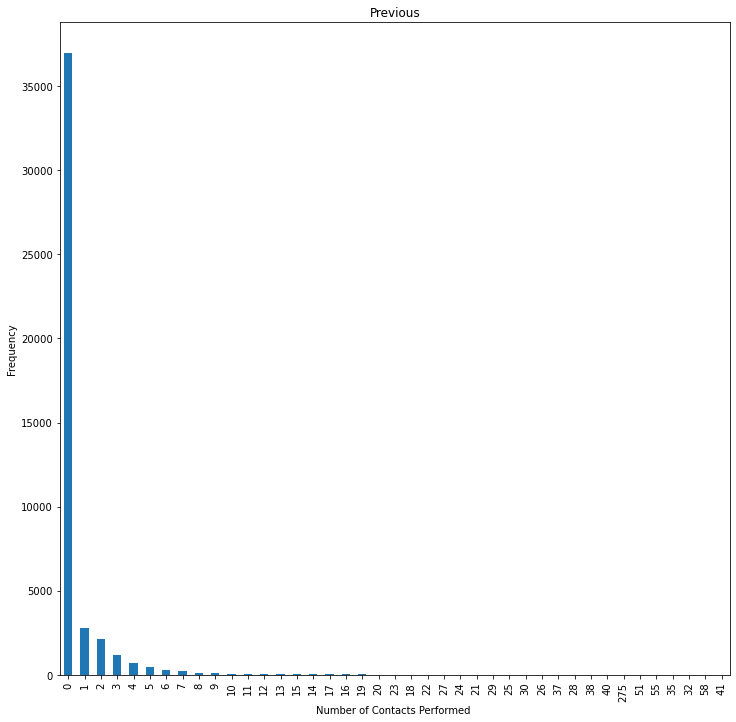

In [93]:
#Calulating previous
previousCounts = df['previous'].value_counts().plot.bar(title='Previous', figsize=(12,12))
plt.xlabel('Number of Contacts Performed ')
plt.ylabel('Frequency')
plt.show()

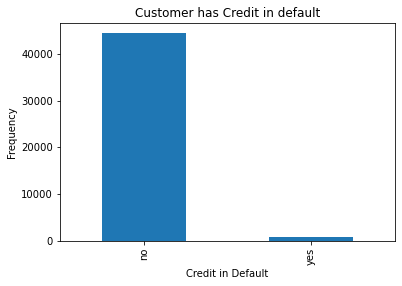

In [94]:
#Calculating default
defaultCounts = df['default'].value_counts().plot.bar()
plt.title('Customer has Credit in default')
plt.xlabel('Credit in Default')
plt.ylabel('Frequency')
plt.show()

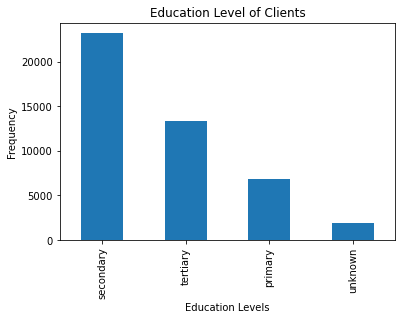

In [95]:
educationCounts = df['education'].value_counts().plot.bar()
plt.title('Education Level of Clients')
plt.xlabel('Education Levels')
plt.ylabel('Frequency')
plt.show()

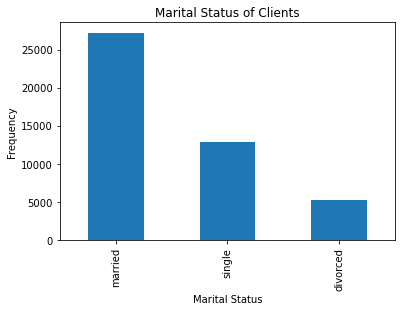

In [96]:
#Calculating marital
maritalCounts = df['marital'].value_counts().plot.bar()
plt.title('Marital Status of Clients')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.show()

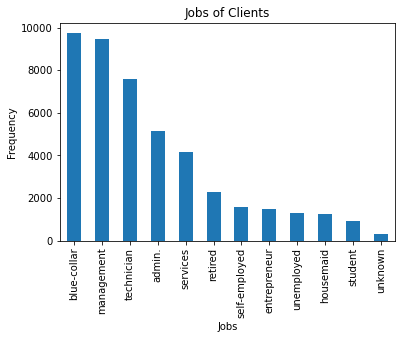

In [97]:
#Calculating job
jobCounts = df['job'].value_counts().plot.bar()
plt.title('Jobs of Clients')
plt.xlabel('Jobs')
plt.ylabel('Frequency')
plt.show()

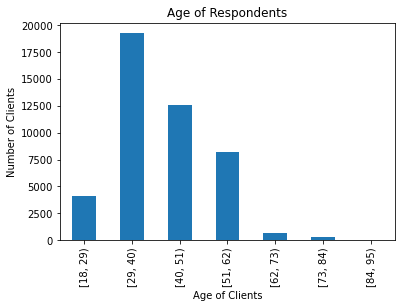

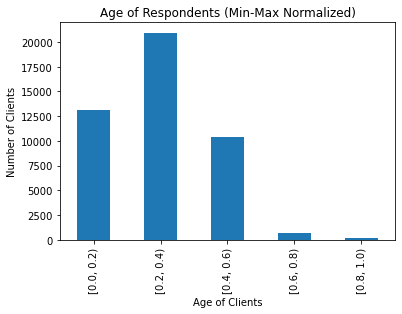

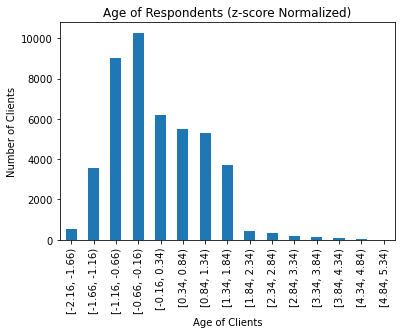

In [98]:
#This code prints out a formatted version of the Age Attribute from Bank-Full.csv
step = 10
bin_range = np.arange(minAge,maxAge+step, step+1)
out, bins = pd.cut(df['age'], bins=bin_range, include_lowest=True, right=False, retbins=True)
out.value_counts(sort=False).plot.bar(title='Age of Respondents')
agePlot = plt.plot()
plt.xlabel("Age of Clients")
plt.ylabel("Number of Clients")
plt.show()

# Using Min-Max Normalization for Age Attribute
def MinMaxScalar(X):
    return (X - minAge)/(maxAge-minAge)

df['minMaxNormalization_Age'] = df['age'].apply(MinMaxScalar)

MinMaxNormalized_AgeMin = df['minMaxNormalization_Age'].min()
MinMaxNormalized_AgeMax = df['minMaxNormalization_Age'].max()

#Prints Min-Max Normalized Histogram of the Age Attribute
step = 0.1
bin_range_normalized = np.arange(0.0, 1.0+step, step+0.1)
out, bins = pd.cut(df['minMaxNormalization_Age'], bins=bin_range_normalized, include_lowest=True, right=False, retbins=True)
out.value_counts(sort=False).plot.bar(title='Age of Respondents (Min-Max Normalized)')
normalizedAgePlot = plt.plot()
plt.xlabel("Age of Clients")
plt.ylabel("Number of Clients")
plt.show()

# Using z-score Normalization of the Age Attribute
af['z_score_age'] = stats.zscore(df['age'])

zScore_AgeMin = af['z_score_age'].min()
zScore_AgeMax = af['z_score_age'].max()

#Prints z-score Normalized Histogram of the Age Attribute
step = 0.5
bin_range_zScoreAgenormalized = np.arange(zScore_AgeMin, zScore_AgeMax+step, step)
out, bins = pd.cut(af['z_score_age'], bins=bin_range_zScoreAgenormalized, include_lowest=True, right=False, retbins=True)
out.value_counts(sort=False).plot.bar(title='Age of Respondents (z-score Normalized)')
zScoreNormalizedAgePlot = plt.plot()
plt.xlabel("Age of Clients")
plt.ylabel("Number of Clients")
plt.show()

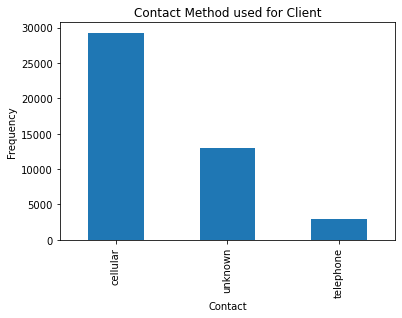

In [99]:
###################################################################
#Calculating contact
contactCounts = df['contact'].value_counts().plot.bar()
plt.title('Contact Method used for Client')
plt.xlabel('Contact')
plt.ylabel('Frequency')
plt.show()

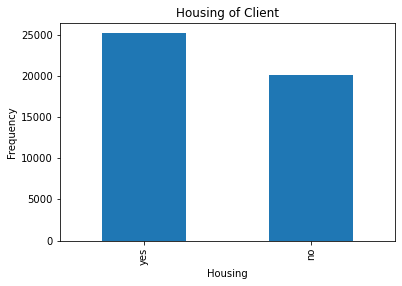

In [100]:
#Calculating housing
housingCounts = df['housing'].value_counts().plot.bar()
plt.title('Housing of Client')
plt.xlabel('Housing')
plt.ylabel('Frequency')
plt.show()

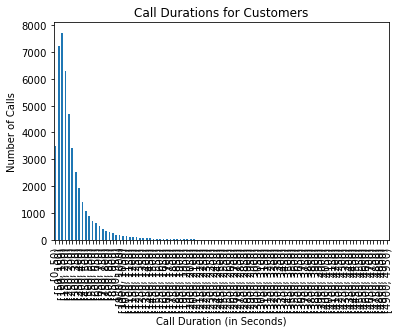

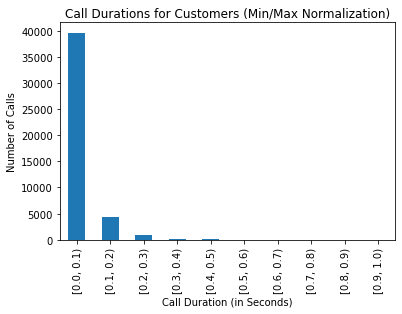

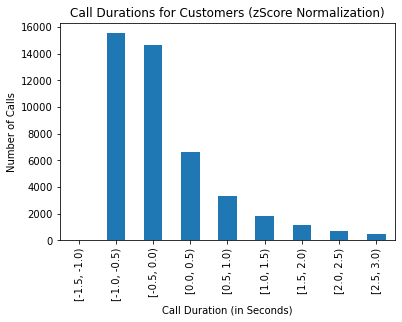

In [101]:
#########################################################################
#Calulating Duration
durationStd = df['duration'].std()
durationMean = df['duration'].mean()
durationMedian = df['duration'].median()
durationMax = df['duration'].max()
durationMin = df['duration'].min()

#This code prints out a formatted version of the Duration Attribute from Bank-Full.csv
step = 50
duration_bin_range = np.arange(durationMin, durationMax+step, step)
out, bins = pd.cut(df['duration'], bins=duration_bin_range, include_lowest=True, right=False, retbins=True)
out.value_counts(sort=False).plot.bar(title='Call Durations for Customers')
durationPlotFormatted = plt.plot()
plt.xlabel("Call Duration (in Seconds)")
plt.ylabel("Number of Calls")
plt.show()

# Using Min-Max Normalization for Duration Attribute
def MinMaxScalar(X):
    return (X - durationMin)/(durationMax-durationMin)

df['minMaxNormalization_Duration'] = df['duration'].apply(MinMaxScalar)

MinMaxNormalized_DurationMin = df['minMaxNormalization_Duration'].min()
MinMaxNormalized_DurationMax = df['minMaxNormalization_Duration'].max()

#Prints Min-Max Normalized Histogram of the Duration Attribute
step = 0.1
duration_bin_range_normalized = np.arange(MinMaxNormalized_DurationMin, MinMaxNormalized_DurationMax+step, step)
out, bins = pd.cut(df['minMaxNormalization_Duration'], bins=duration_bin_range_normalized, include_lowest=True, right=False, retbins=True)
out.value_counts(sort=False).plot.bar(title='Call Durations for Customers (Min/Max Normalization)')
durationPlotMinMaxNormalization = plt.plot()
plt.xlabel("Call Duration (in Seconds)")
plt.ylabel("Number of Calls")
plt.show()

# Using z-score Normalization of the Duration Attribute
df['z_score_duration'] = stats.zscore(df['duration'])

zScore_DurationMin = df['z_score_duration'].min()
zScore_DurationMax = df['z_score_duration'].max()

#Prints z-score Normalized Histogram of the Duration Attribute
step = 0.5
duration_bin_range_normalized = np.arange(-1.5, 3+step, step)
out, bins = pd.cut(df['z_score_duration'], bins=duration_bin_range_normalized, include_lowest=True, right=False, retbins=True)
durationHistogram = out.value_counts(sort=False).plot(kind = 'bar', title='Call Durations for Customers (zScore Normalization)')
durationPlotzScoreNormalization = plt.plot()
plt.xlabel("Call Duration (in Seconds)")
plt.ylabel("Number of Calls")
plt.show()

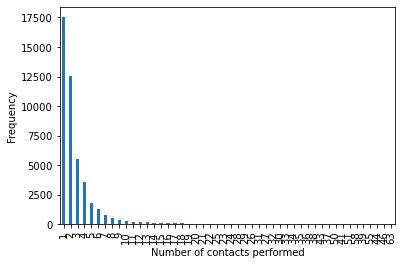

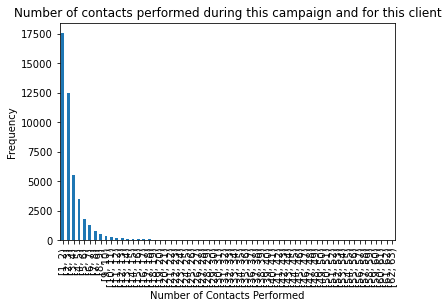

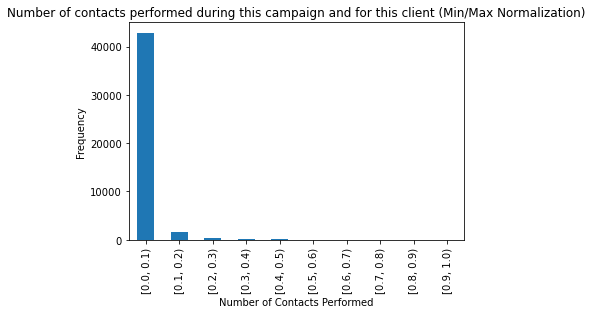

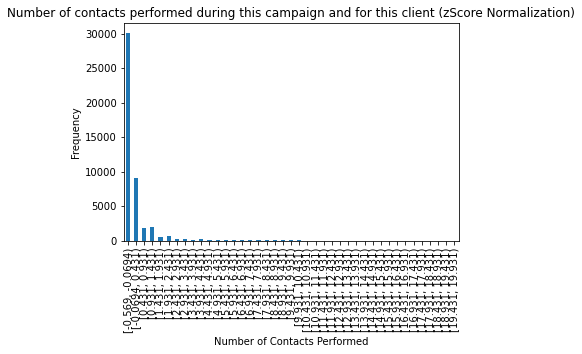

In [102]:
###################################################################
#Calulating Campaign
campaignStd = df['campaign'].std()
campaignMean = df['campaign'].mean()
campaignMedian = df['campaign'].median()
campaignMax = df['campaign'].max()
campaignMin = df['campaign'].min()

pOutcomeCounts = df['campaign'].value_counts().plot.bar()
#plt.title('Number of contacts performed during this campaign and for this client')
plt.xlabel('Number of contacts performed')
plt.ylabel('Frequency')
plt.show()

#This code prints out a formatted version of the Campaign Attribute from Bank-Full.csv
step = 1
duration_bin_range = np.arange(campaignMin, campaignMax+step, step)
out, bins = pd.cut(df['campaign'], bins=duration_bin_range, include_lowest=True, right=False, retbins=True)
out.value_counts(sort=False).plot.bar(title='Number of contacts performed during this campaign and for this client')
campaignPlotFormatted = plt.plot()
plt.xlabel("Number of Contacts Performed")
plt.ylabel("Frequency")
plt.show()

# Using Min-Max Normalization for Campaign Attribute
def MinMaxScalar(X):
    return (X - campaignMin)/(campaignMax-campaignMin)

df['minMaxNormalization_Campaign'] = df['campaign'].apply(MinMaxScalar)

MinMaxNormalized_CampaignMin = df['minMaxNormalization_Campaign'].min()
MinMaxNormalized_CampaignMax = df['minMaxNormalization_Campaign'].max()

#Prints Min-Max Normalized Histogram of the Campaign Attribute
step = 0.1
campaign_bin_range_normalized = np.arange(MinMaxNormalized_CampaignMin, MinMaxNormalized_CampaignMax+step, step)
out, bins = pd.cut(df['minMaxNormalization_Campaign'], bins=campaign_bin_range_normalized, include_lowest=True, right=False, retbins=True)
out.value_counts(sort=False).plot.bar(title='Number of contacts performed during this campaign and for this client (Min/Max Normalization)')
campaignPlotMinMaxNormalization = plt.plot()
plt.xlabel("Number of Contacts Performed")
plt.ylabel("Frequency")
plt.show()

# Using z-score Normalization of the Campaign Attribute
df['z_score_campaign'] = stats.zscore(df['campaign'])

zScore_CampaignMin = df['z_score_campaign'].min()
zScore_CampaignMax = df['z_score_campaign'].max()

#Prints z-score Normalized Histogram of the Campaign Attribute
step = 0.5
bin_range_campaignzScorenormalized = np.arange(zScore_CampaignMin , zScore_CampaignMax+step, step)
out, bins = pd.cut(df['z_score_campaign'], bins=bin_range_campaignzScorenormalized, include_lowest=True, right=False, retbins=True)
campaignHistogram = out.value_counts(sort=False).plot(kind = 'bar', title='Number of contacts performed during this campaign and for this client (zScore Normalization)')
campaignPlotzScoreNormalization = plt.plot()
plt.xlabel("Number of Contacts Performed")
plt.ylabel("Frequency")
plt.show()

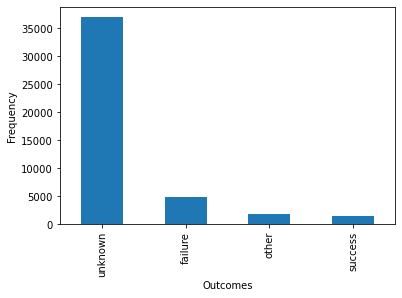

In [103]:
###################################################################
#Calulating poutcome
pOutcomeCounts = df['poutcome'].value_counts().plot.bar()
plt.xlabel('Outcomes')
plt.ylabel('Frequency')
plt.show()

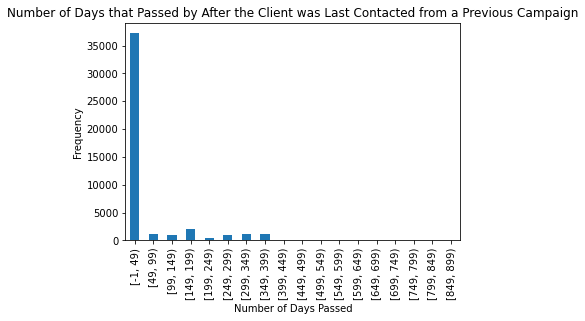

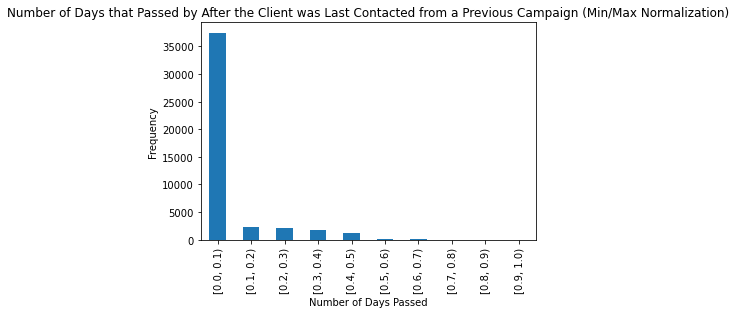

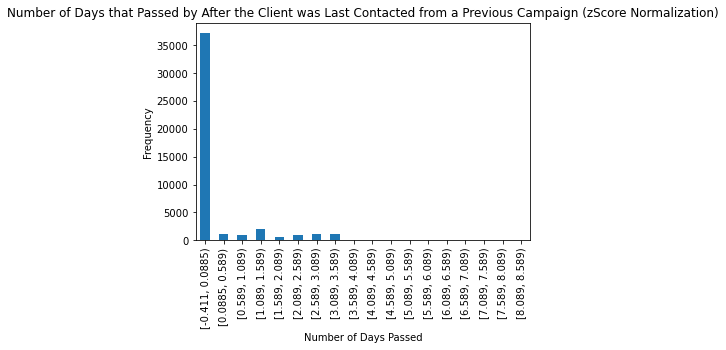

In [104]:
###################################################################
#Calculating pdays
pdaysStd = df['pdays'].std()
pdaysMean = df['pdays'].mean()
pdaysMedian = df['pdays'].median()
pdaysMax = df['pdays'].max()
pdaysMin = df['pdays'].min()

#This code prints out a formatted version of the pdays Attribute from Bank-Full.csv
step = 50
pdays_bin_range = np.arange(pdaysMin,pdaysMax+step, step)
out, bins = pd.cut(df['pdays'], bins=pdays_bin_range, include_lowest=True, right=False, retbins=True)
out.value_counts(sort=False).plot.bar(title='Number of Days that Passed by After the Client was Last Contacted from a Previous Campaign')
pdaysPlotFormatted = plt.plot()
plt.xlabel("Number of Days Passed")
plt.ylabel("Frequency")
plt.show()

#df['pdays'].replace([-1], 0)

# Using Min-Max Normalization for pdays Attribute
def MinMaxScalar(X):
    return (X - pdaysMin)/(pdaysMax-pdaysMin)

df['minMaxNormalization_Pdays'] = df['pdays'].apply(MinMaxScalar)

MinMaxNormalized_PdaysMin = df['minMaxNormalization_Pdays'].min()
MinMaxNormalized_PdaysMax = df['minMaxNormalization_Pdays'].max()

#Prints Min-Max Normalized Histogram of the pdays Attribute
step = 0.1
pdays_bin_range_normalized = np.arange(MinMaxNormalized_PdaysMin, MinMaxNormalized_PdaysMax+step, step)
out, bins = pd.cut(df['minMaxNormalization_Pdays'], bins=pdays_bin_range_normalized, include_lowest=True, right=False, retbins=True)
out.value_counts(sort=False).plot.bar(title='Number of Days that Passed by After the Client was Last Contacted from a Previous Campaign (Min/Max Normalization)')
pdaysPlotMinMaxNormalization = plt.plot()
plt.xlabel("Number of Days Passed")
plt.ylabel("Frequency")
plt.show()

# Using z-score Normalization of the Age Attribute
df['z_score_pdays'] = stats.zscore(df['pdays'])
zScore_PdaysMin = df['z_score_pdays'].min()
zScore_PdaysMax = df['z_score_pdays'].max()

#Prints z-score Normalized Histogram of the pdays Attribute
step = 0.5
bin_range_pdayszScorenormalized = np.arange(zScore_PdaysMin , zScore_PdaysMax+step, step)
out, bins = pd.cut(df['z_score_pdays'], bins=bin_range_pdayszScorenormalized, include_lowest=True, right=False, retbins=True)
pdaysHistogram = out.value_counts(sort=False).plot(kind = 'bar', title='Number of Days that Passed by After the Client was Last Contacted from a Previous Campaign (zScore Normalization)')
pdaysPlotzScoreNormalization = plt.plot()
plt.xlabel("Number of Days Passed")
plt.ylabel("Frequency")
plt.show()

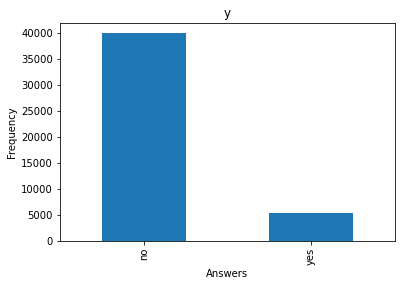

In [105]:
###################################################################
#Calculating y
df['yCounts'] = df['y'].value_counts()
yCountsPlot = df['y'].value_counts().plot.bar()
plt.title('y')
plt.xlabel('Answers')
plt.ylabel('Frequency')
plt.show()

In [106]:
#Decision Tree
pd.options.mode.chained_assignment = None  # default='warn'
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result: \n==========================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred):.4f}\n")
        print(f"Classification Report:  \n \tPrecision: {precision_score(y_train, pred)}\n \tRecall Score: {recall_score(y_train, pred)}")
        print(f"Confusion Matrix: {confusion_matrix(y_train, clf.predict(X_train))}")
    elif train == False:
        print("Test Result: \n==========================================")
        pred = clf.predict(X_test)
        print(f"Accuracy Score: {accuracy_score(y_test, pred):.4f}\n")
        print(f"Classification Report:  \n \tPrecision: {precision_score(y_test, pred)}\n \tRecall Score: {recall_score(y_test, pred)}")
        print(f"Confusion Matrix: {confusion_matrix(y_test, pred)}")
    
inputs = df[["age", "job", "marital", "education", "default", "housing", "loan", "poutcome"]]
#inputs.job = inputs.job.map({'management': 0, 'technician' : 1, 'entrepreneur' : 2, 'blue-collar' : 3, 'admin' : 4, 'services' : 5, 'student' : 6,'housemaid' : 7, 'self-employed' : 8, 'retired': 9, 'unemployed' : 10, 'unknown' : 11})

In [107]:
#Category Encoders
le_job = LabelEncoder()
le_marital = LabelEncoder()
le_education = LabelEncoder()
le_default = LabelEncoder()
le_housing = LabelEncoder()
le_loan = LabelEncoder()
le_poutcome = LabelEncoder()
le_y = LabelEncoder()

In [108]:
#Transforming Categorical Attributes into Numerical Attributes
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['marital_n'] = le_marital.fit_transform(inputs['marital'])
inputs['education_n'] = le_education.fit_transform(inputs['education'])
inputs['default_n'] = le_default.fit_transform(inputs['default'])
inputs['housing_n'] = le_housing.fit_transform(inputs['housing'])
inputs['loan_n'] = le_loan.fit_transform(inputs['loan'])
inputs['poutcome_n'] = le_poutcome.fit_transform(inputs['poutcome'])
inputs['y_n'] = le_y.fit_transform(df['y'])

target = inputs['y_n']
inputs = inputs.drop('y_n', axis='columns')
inputs.head()

,age,job,marital,education,default,housing,loan,poutcome,job_n,marital_n,education_n,default_n,housing_n,loan_n,poutcome_n
0,58,management,married,tertiary,no,yes,no,unknown,4,1,2,0,1,0,3
1,44,technician,single,secondary,no,yes,no,unknown,9,2,1,0,1,0,3
2,33,entrepreneur,married,secondary,no,yes,yes,unknown,2,1,1,0,1,1,3
3,47,blue-collar,married,unknown,no,yes,no,unknown,1,1,3,0,1,0,3
4,33,unknown,single,unknown,no,no,no,unknown,11,2,3,0,0,0,3


In [109]:
#Dropping Unrelated columns from table
inputs_n = inputs.drop(["job", "marital", "education", "default", "housing", "loan", "poutcome"], axis='columns')
inputs_n.head()

,age,job_n,marital_n,education_n,default_n,housing_n,loan_n,poutcome_n
0,58,4,1,2,0,1,0,3
1,44,9,2,1,0,1,0,3
2,33,2,1,1,0,1,1,3
3,47,1,1,3,0,1,0,3
4,33,11,2,3,0,0,0,3


In [110]:
attributeMap = pd.DataFrame()
inputs_Map = inputs.drop(["age", "job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "poutcome_n"], axis='columns')
inputs_n_Map = inputs_n.drop("age", axis=1)
attributeMap = inputs_Map.join(inputs_n_Map)
attributeMap

,job,marital,education,default,housing,loan,poutcome,job_n,marital_n,education_n,default_n,housing_n,loan_n,poutcome_n
0,management,married,tertiary,no,yes,no,unknown,4,1,2,0,1,0,3
1,technician,single,secondary,no,yes,no,unknown,9,2,1,0,1,0,3
2,entrepreneur,married,secondary,no,yes,yes,unknown,2,1,1,0,1,1,3
3,blue-collar,married,unknown,no,yes,no,unknown,1,1,3,0,1,0,3
4,unknown,single,unknown,no,no,no,unknown,11,2,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,unknown,9,1,2,0,0,0,3
45207,retired,divorced,primary,no,no,no,unknown,5,0,0,0,0,0,3
45208,retired,married,secondary,no,no,no,success,5,1,1,0,0,0,2
45209,blue-collar,married,secondary,no,no,no,unknown,1,1,1,0,0,0,3


In [127]:
bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
inputs_n['agerange'] = pd.cut(inputs_n.age, bins, labels = labels,include_lowest = True)
le_agerange = LabelEncoder()
inputs_n['agerange'] = le_agerange.fit_transform(inputs_n['agerange'])
inputs_n.drop(["age"], axis='columns')

,job_n,marital_n,education_n,default_n,housing_n,loan_n,poutcome_n,agerange
0,4,1,2,0,1,0,3,3
1,9,2,1,0,1,0,3,2
2,2,1,1,0,1,1,3,1
3,1,1,3,0,1,0,3,2
4,11,2,3,0,0,0,3,1
...,...,...,...,...,...,...,...,...
45206,9,1,2,0,0,0,3,3
45207,5,0,0,0,0,0,3,5
45208,5,1,1,0,0,0,2,5
45209,1,1,1,0,0,0,3,3


In [125]:
#Testing for Accuracy, Classification, Precision, Recall Score, and Confusion Matrix
X_train, X_test, y_train, y_test = train_test_split(inputs_n, target, test_size=0.2)

clf = tree.DecisionTreeClassifier(max_depth = 5)
clf.fit(inputs_n, target)

print_score(clf, X_train,y_train, X_test, y_test, train=True)
print_score(clf, X_train,y_train, X_test, y_test, train=False)

Train Result: 
Accuracy Score: 0.8934

Classification Report:  
 	Precision: 0.6612612612612613
 	Recall Score: 0.17426400759734093
Confusion Matrix: [[31580   376]
 [ 3478   734]]
Test Result: 
Accuracy Score: 0.8932

Classification Report:  
 	Precision: 0.6819672131147541
 	Recall Score: 0.19312906220984216
Confusion Matrix: [[7869   97]
 [ 869  208]]


In [126]:
inputs_n.dtypes

age            int64
job_n          int32
marital_n      int32
education_n    int32
default_n      int32
housing_n      int32
loan_n         int32
poutcome_n     int32
agerange       int32
dtype: object

In [129]:
features = list(inputs_n.columns)

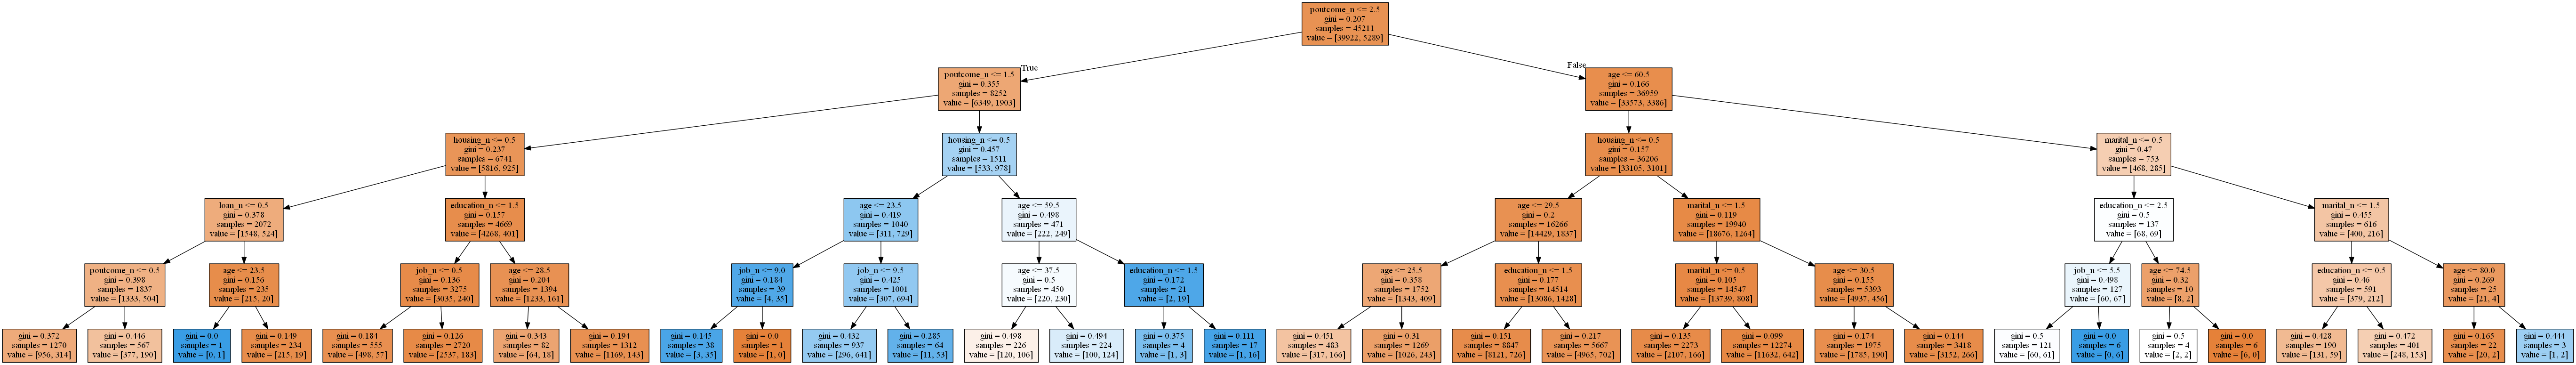

In [130]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, feature_names=features, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(figsize=))